In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    def forward(self, input)
        pass

    def backward(self, output_gradient, learning_rate):
        pass

In [3]:
class Dense(Layer):
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(output_size, input_size)
        self.bias = np.random.randn(output_size, 1)

    def forward(self, input):
        self.input = input
        return np.dot(self.weights, self.input) + self.bias

    def backward(self, output_gradient, learning_rate):
        weights_gradient = np.dot(output_gradient, self.input.T)
        input_gradient = np.dot(self.weights.T, output_gradient)
        self.weights -= learning_rate * weights_gradient
        self.bias -= learning_rate * output_gradient
        return input_gradient

In [4]:
class Activation(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    def forward(self, input):
        self.input = input
        return self.activation(self.input)

    def backward(self, output_gradient, learning_rate):
        return np.multiply(output_gradient, self.activation_prime(self.input))

In [5]:
class Tanh(Activation):
    def __init__(self):
        def tanh(x):
            return np.tanh(x)

        def tanh_prime(x):
            return 1 - np.tanh(x) ** 2

        super().__init__(tanh, tanh_prime)

class Sigmoid(Activation):
    def __init__(self):
        def sigmoid(x):
            return 1 / (1 + np.exp(-x))

        def sigmoid_prime(x):
            s = sigmoid(x)
            return s * (1 - s)

        super().__init__(sigmoid, sigmoid_prime)

class Softmax(Layer):
    def forward(self, input):
        tmp = np.exp(input)
        self.output = tmp / np.sum(tmp)
        return self.output
    
    def backward(self, output_gradient, learning_rate):
        n = np.size(self.output)
        return np.dot((np.identity(n) - self.output.T) * self.output, output_gradient)

In [6]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / np.size(y_true)

def binary_cross_entropy(y_true, y_pred):
    return np.mean(-y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred))

def binary_cross_entropy_prime(y_true, y_pred):
    return ((1 - y_true) / (1 - y_pred) - y_true / y_pred) / np.size(y_true)

In [7]:
def predict(network, input):
    output = input
    for layer in network:
        output = layer.forward(output)
    return output

def train(network, loss, loss_prime, x_train, y_train, epochs = 1000, learning_rate = 0.01, verbose = True):
    for e in range(epochs):
        error = 0
        for x, y in zip(x_train, y_train):
            # forward
            output = predict(network, x)

            # error
            error += loss(y, output)

            # backward
            grad = loss_prime(y, output)
            for layer in reversed(network):
                grad = layer.backward(grad, learning_rate)

        error /= len(x_train)
        if verbose:
            print(f"{e + 1}/{epochs}, error={error}")

In [31]:
X = np.reshape([[0, 0], [0, 1], [1, 0], [1, 1]], (4, 2, 1))
Y = np.reshape([[0], [1], [1], [0]], (4, 1, 1))

network = [
    Dense(2, 3),
    Tanh(),
    Dense(3, 1),
    Tanh()
]

# train
train(network, mse, mse_prime, X, Y, epochs=20000, learning_rate=0.01)

1/20000, error=0.343116282958996
2/20000, error=0.33668725853721254
3/20000, error=0.33026830865249956
4/20000, error=0.32393836255112163
5/20000, error=0.31777845770711854
6/20000, error=0.3118660369307204
7/20000, error=0.3062689948602486
8/20000, error=0.3010404566984246
9/20000, error=0.2962152191484605
10/20000, error=0.2918084533533224
11/20000, error=0.28781676071468143
12/20000, error=0.2842211629917612
13/20000, error=0.2809912679473353
14/20000, error=0.27808976349564474
15/20000, error=0.27547652983613896
16/20000, error=0.27311192139910573
17/20000, error=0.27095904833036627
18/20000, error=0.26898510437514694
19/20000, error=0.2671619155108036
20/20000, error=0.26546592936061264
21/20000, error=0.26387785470968944
22/20000, error=0.26238212058460003
23/20000, error=0.260966276153815
24/20000, error=0.2596204085373093
25/20000, error=0.25833662088274445
26/20000, error=0.2571085886764311
27/20000, error=0.2559311968222734
28/20000, error=0.2548002513642674
29/20000, error=0

923/20000, error=0.007155591379814888
924/20000, error=0.007140695651236021
925/20000, error=0.007125854723094309
926/20000, error=0.007111068314279036
927/20000, error=0.007096336145498493
928/20000, error=0.0070816579392659115
929/20000, error=0.007067033419885599
930/20000, error=0.007052462313439141
931/20000, error=0.00703794434777175
932/20000, error=0.0070234792524787445
933/20000, error=0.0070090667588920815
934/20000, error=0.0069947066000671295
935/20000, error=0.006980398510769378
936/20000, error=0.006966142227461515
937/20000, error=0.006951937488290332
938/20000, error=0.0069377840330739895
939/20000, error=0.00692368160328924
940/20000, error=0.006909629942058771
941/20000, error=0.006895628794138852
942/20000, error=0.006881677905906758
943/20000, error=0.006867777025348588
944/20000, error=0.006853925902047058
945/20000, error=0.006840124287169417
946/20000, error=0.0068263719334554955
947/20000, error=0.006812668595205851
948/20000, error=0.006799014028269942
949/2000

1822/20000, error=0.0022882170425235016
1823/20000, error=0.0022863531000997207
1824/20000, error=0.0022844919884418475
1825/20000, error=0.002282633701329468
1826/20000, error=0.002280778232559966
1827/20000, error=0.0022789255759484454
1828/20000, error=0.0022770757253276898
1829/20000, error=0.002275228674548066
1830/20000, error=0.0022733844174774934
1831/20000, error=0.0022715429480013797
1832/20000, error=0.0022697042600225395
1833/20000, error=0.0022678683474611485
1834/20000, error=0.002266035204254692
1835/20000, error=0.002264204824357879
1836/20000, error=0.0022623772017425904
1837/20000, error=0.002260552330397853
1838/20000, error=0.0022587302043297237
1839/20000, error=0.002256910817561267
1840/20000, error=0.0022550941641324893
1841/20000, error=0.002253280238100279
1842/20000, error=0.002251469033538338
1843/20000, error=0.0022496605445371373
1844/20000, error=0.002247854765203854
1845/20000, error=0.00224605168966231
1846/20000, error=0.0022442513120529144
1847/20000, 

2740/20000, error=0.0012869290834501377
2741/20000, error=0.0012862971731924435
2742/20000, error=0.001285665850007686
2743/20000, error=0.0012850351130995316
2744/20000, error=0.0012844049616730871
2745/20000, error=0.0012837753949348485
2746/20000, error=0.001283146412092733
2747/20000, error=0.0012825180123560687
2748/20000, error=0.0012818901949355702
2749/20000, error=0.0012812629590433656
2750/20000, error=0.0012806363038929758
2751/20000, error=0.0012800102286993173
2752/20000, error=0.0012793847326786928
2753/20000, error=0.0012787598150487986
2754/20000, error=0.0012781354750287114
2755/20000, error=0.0012775117118388876
2756/20000, error=0.0012768885247011728
2757/20000, error=0.0012762659128387752
2758/20000, error=0.0012756438754762836
2759/20000, error=0.001275022411839662
2760/20000, error=0.001274401521156219
2761/20000, error=0.001273781202654655
2762/20000, error=0.0012731614555650094
2763/20000, error=0.0012725422791186926
2764/20000, error=0.001271923672548464
2765/2

3645/20000, error=0.0008852883818063861
3646/20000, error=0.0008849778880075425
3647/20000, error=0.0008846676017310491
3648/20000, error=0.0008843575227735575
3649/20000, error=0.0008840476509319815
3650/20000, error=0.0008837379860034927
3651/20000, error=0.0008834285277855261
3652/20000, error=0.0008831192760757832
3653/20000, error=0.0008828102306722136
3654/20000, error=0.0008825013913730411
3655/20000, error=0.0008821927579767374
3656/20000, error=0.0008818843302820416
3657/20000, error=0.0008815761080879376
3658/20000, error=0.0008812680911936873
3659/20000, error=0.0008809602793987962
3660/20000, error=0.0008806526725030281
3661/20000, error=0.0008803452703064074
3662/20000, error=0.0008800380726092197
3663/20000, error=0.0008797310792119923
3664/20000, error=0.0008794242899155273
3665/20000, error=0.0008791177045208632
3666/20000, error=0.0008788113228293052
3667/20000, error=0.0008785051446424134
3668/20000, error=0.0008781991697619941
3669/20000, error=0.0008778933979901139


4608/20000, error=0.0006593746140641011
4609/20000, error=0.0006591977655512984
4610/20000, error=0.0006590210078497863
4611/20000, error=0.0006588443408910182
4612/20000, error=0.0006586677646065208
4613/20000, error=0.0006584912789278813
4614/20000, error=0.000658314883786757
4615/20000, error=0.0006581385791148769
4616/20000, error=0.0006579623648440346
4617/20000, error=0.000657786240906091
4618/20000, error=0.0006576102072329757
4619/20000, error=0.0006574342637566845
4620/20000, error=0.0006572584104092829
4621/20000, error=0.0006570826471229043
4622/20000, error=0.000656906973829744
4623/20000, error=0.0006567313904620733
4624/20000, error=0.0006565558969522224
4625/20000, error=0.0006563804932325916
4626/20000, error=0.0006562051792356493
4627/20000, error=0.0006560299548939287
4628/20000, error=0.0006558548201400306
4629/20000, error=0.0006556797749066268
4630/20000, error=0.0006555048191264484
4631/20000, error=0.0006553299527322936
4632/20000, error=0.000655155175657035
4633

5517/20000, error=0.0005291174671343394
5518/20000, error=0.0005290015082533272
5519/20000, error=0.0005288855981749461
5520/20000, error=0.0005287697368689527
5521/20000, error=0.0005286539243051303
5522/20000, error=0.000528538160453287
5523/20000, error=0.0005284224452832541
5524/20000, error=0.0005283067787648883
5525/20000, error=0.0005281911608680728
5526/20000, error=0.0005280755915627118
5527/20000, error=0.0005279600708187371
5528/20000, error=0.0005278445986061028
5529/20000, error=0.0005277291748947911
5530/20000, error=0.000527613799654802
5531/20000, error=0.0005274984728561673
5532/20000, error=0.0005273831944689396
5533/20000, error=0.000527267964463194
5534/20000, error=0.0005271527828090354
5535/20000, error=0.0005270376494765889
5536/20000, error=0.0005269225644360031
5537/20000, error=0.000526807527657457
5538/20000, error=0.000526692539111145
5539/20000, error=0.000526577598767294
5540/20000, error=0.0005264627065961478
5541/20000, error=0.000526347862567982
5542/20

6429/20000, error=0.00044042301202468155
6430/20000, error=0.00044034152421524756
6431/20000, error=0.00044026006542554344
6432/20000, error=0.0004401786356403336
6433/20000, error=0.0004400972348443948
6434/20000, error=0.0004400158630225149
6435/20000, error=0.0004399345201594876
6436/20000, error=0.00043985320624011627
6437/20000, error=0.0004397719212492248
6438/20000, error=0.00043969066517163756
6439/20000, error=0.0004396094379921939
6440/20000, error=0.00043952823969574135
6441/20000, error=0.00043944707026714045
6442/20000, error=0.00043936592969125935
6443/20000, error=0.00043928481795298027
6444/20000, error=0.00043920373503719245
6445/20000, error=0.0004391226809287976
6446/20000, error=0.000439041655612708
6447/20000, error=0.00043896065907384304
6448/20000, error=0.0004388796912971381
6449/20000, error=0.00043879875226753495
6450/20000, error=0.00043871784196998617
6451/20000, error=0.0004386369603894555
6452/20000, error=0.0004385561075109194
6453/20000, error=0.00043847

7395/20000, error=0.0003732763889846565
7396/20000, error=0.0003732171407719001
7397/20000, error=0.0003731579106941422
7398/20000, error=0.00037309869874318694
7399/20000, error=0.00037303950491085545
7400/20000, error=0.0003729803291889571
7401/20000, error=0.0003729211715693228
7402/20000, error=0.0003728620320437749
7403/20000, error=0.0003728029106041523
7404/20000, error=0.0003727438072422865
7405/20000, error=0.0003726847219500275
7406/20000, error=0.0003726256547192167
7407/20000, error=0.00037256660554170907
7408/20000, error=0.00037250757440936366
7409/20000, error=0.00037244856131403886
7410/20000, error=0.00037238956624760505
7411/20000, error=0.0003723305892019316
7412/20000, error=0.0003722716301688985
7413/20000, error=0.0003722126891403855
7414/20000, error=0.0003721537661082791
7415/20000, error=0.0003720948610644667
7416/20000, error=0.0003720359740008526
7417/20000, error=0.00037197710490933264
7418/20000, error=0.00037191825378180953
7419/20000, error=0.000371859420

8313/20000, error=0.0003255933666858372
8314/20000, error=0.0003255478549626766
8315/20000, error=0.00032550235552516343
8316/20000, error=0.00032545686836840264
8317/20000, error=0.00032541139348749823
8318/20000, error=0.00032536593087755444
8319/20000, error=0.00032532048053368477
8320/20000, error=0.00032527504245100016
8321/20000, error=0.0003252296166246177
8322/20000, error=0.0003251842030496517
8323/20000, error=0.0003251388017212252
8324/20000, error=0.00032509341263446185
8325/20000, error=0.0003250480357844824
8326/20000, error=0.0003250026711664188
8327/20000, error=0.0003249573187754008
8328/20000, error=0.0003249119786065622
8329/20000, error=0.0003248666506550367
8330/20000, error=0.000324821334915963
8331/20000, error=0.00032477603138448175
8332/20000, error=0.0003247307400557393
8333/20000, error=0.0003246854609248773
8334/20000, error=0.0003246401939870451
8335/20000, error=0.0003245949392373953
8336/20000, error=0.0003245496966710804
8337/20000, error=0.0003245044662

9225/20000, error=0.00028863917730775744
9226/20000, error=0.00028860311820846116
9227/20000, error=0.0002885670678192839
9228/20000, error=0.00028853102613711555
9229/20000, error=0.0002884949931588487
9230/20000, error=0.000288458968881378
9231/20000, error=0.0002884229533015994
9232/20000, error=0.0002883869464164069
9233/20000, error=0.0002883509482227025
9234/20000, error=0.0002883149587173836
9235/20000, error=0.000288278977897351
9236/20000, error=0.00028824300575950896
9237/20000, error=0.00028820704230076056
9238/20000, error=0.0002881710875180118
9239/20000, error=0.0002881351414081686
9240/20000, error=0.000288099203968142
9241/20000, error=0.0002880632751948402
9242/20000, error=0.0002880273550851734
9243/20000, error=0.0002879914436360555
9244/20000, error=0.0002879555408444004
9245/20000, error=0.00028791964670712663
9246/20000, error=0.0002878837612211485
9247/20000, error=0.0002878478843833854
9248/20000, error=0.0002878120161907564
9249/20000, error=0.00028777615664018

10128/20000, error=0.00025928126907372043
10129/20000, error=0.0002592519674157799
10130/20000, error=0.0002592226721670477
10131/20000, error=0.0002591933833254504
10132/20000, error=0.0002591641008889189
10133/20000, error=0.0002591348248553819
10134/20000, error=0.00025910555522276564
10135/20000, error=0.00025907629198900417
10136/20000, error=0.000259047035152028
10137/20000, error=0.00025901778470976944
10138/20000, error=0.00025898854066016457
10139/20000, error=0.0002589593030011442
10140/20000, error=0.00025893007173064523
10141/20000, error=0.00025890084684660337
10142/20000, error=0.0002588716283469571
10143/20000, error=0.0002588424162296424
10144/20000, error=0.0002588132104925963
10145/20000, error=0.0002587840111337639
10146/20000, error=0.00025875481815108365
10147/20000, error=0.00025872563154249453
10148/20000, error=0.00025869645130593977
10149/20000, error=0.00025866727743936464
10150/20000, error=0.00025863810994071094
10151/20000, error=0.00025860894880792287
1015

11085/20000, error=0.0002338975639318837
11086/20000, error=0.00023387356218790718
11087/20000, error=0.00023384956521543829
11088/20000, error=0.00023382557301307458
11089/20000, error=0.00023380158557941453
11090/20000, error=0.0002337776029130517
11091/20000, error=0.00023375362501258773
11092/20000, error=0.00023372965187662184
11093/20000, error=0.00023370568350375158
11094/20000, error=0.0002336817198925805
11095/20000, error=0.0002336577610417065
11096/20000, error=0.00023363380694973207
11097/20000, error=0.0002336098576152573
11098/20000, error=0.00023358591303688795
11099/20000, error=0.00023356197321322355
11100/20000, error=0.00023353803814286724
11101/20000, error=0.00023351410782442548
11102/20000, error=0.0002334901822565008
11103/20000, error=0.00023346626143769863
11104/20000, error=0.00023344234536662619
11105/20000, error=0.00023341843404188676
11106/20000, error=0.0002333945274620902
11107/20000, error=0.0002333706256258406
11108/20000, error=0.00023334672853174838


11991/20000, error=0.00021394879322645755
11992/20000, error=0.00021392859997896677
11993/20000, error=0.00021390841042663862
11994/20000, error=0.00021388822456847462
11995/20000, error=0.0002138680424034757
11996/20000, error=0.00021384786393063677
11997/20000, error=0.00021382768914896292
11998/20000, error=0.0002138075180574552
11999/20000, error=0.00021378735065511175
12000/20000, error=0.0002137671869409346
12001/20000, error=0.00021374702691392814
12002/20000, error=0.0002137268705730927
12003/20000, error=0.00021370671791743102
12004/20000, error=0.00021368656894594777
12005/20000, error=0.0002136664236576426
12006/20000, error=0.00021364628205152366
12007/20000, error=0.0002136261441265901
12008/20000, error=0.00021360600988185169
12009/20000, error=0.00021358587931630976
12010/20000, error=0.00021356575242897002
12011/20000, error=0.0002135456292188393
12012/20000, error=0.00021352550968492027
12013/20000, error=0.00021350539382622137
12014/20000, error=0.0002134852816417503


12914/20000, error=0.0001967619738365386
12915/20000, error=0.0001967448079157289
12916/20000, error=0.000196727644900466
12917/20000, error=0.0001967104847900192
12918/20000, error=0.00019669332758366417
12919/20000, error=0.0001966761732806729
12920/20000, error=0.00019665902188031686
12921/20000, error=0.0001966418733818683
12922/20000, error=0.00019662472778460245
12923/20000, error=0.0001966075850877928
12924/20000, error=0.00019659044529071038
12925/20000, error=0.00019657330839263135
12926/20000, error=0.00019655617439282935
12927/20000, error=0.0001965390432905784
12928/20000, error=0.000196521915085154
12929/20000, error=0.00019650478977582895
12930/20000, error=0.00019648766736188124
12931/20000, error=0.0001964705478425838
12932/20000, error=0.0001964534312172127
12933/20000, error=0.00019643631748504664
12934/20000, error=0.00019641920664535751
12935/20000, error=0.00019640209869742386
12936/20000, error=0.00019638499364052232
12937/20000, error=0.00019636789147392812
12938

13818/20000, error=0.00018234676619484962
13819/20000, error=0.0001823319568341937
13820/20000, error=0.00018231714980847951
13821/20000, error=0.0001823023451171599
13822/20000, error=0.00018228754275969033
13823/20000, error=0.00018227274273552709
13824/20000, error=0.0001822579450441243
13825/20000, error=0.00018224314968493812
13826/20000, error=0.00018222835665742345
13827/20000, error=0.0001822135659610371
13828/20000, error=0.00018219877759523463
13829/20000, error=0.00018218399155947346
13830/20000, error=0.000182169207853207
13831/20000, error=0.00018215442647589577
13832/20000, error=0.00018213964742699274
13833/20000, error=0.00018212487070595732
13834/20000, error=0.00018211009631224616
13835/20000, error=0.00018209532424531437
13836/20000, error=0.00018208055450462287
13837/20000, error=0.0001820657870896268
13838/20000, error=0.00018205102199978356
13839/20000, error=0.00018203625923455356
13840/20000, error=0.00018202149879339077
13841/20000, error=0.0001820067406757575


14717/20000, error=0.00016991411901115405
14718/20000, error=0.0001699012074285694
14719/20000, error=0.00016988829775175582
14720/20000, error=0.00016987538998029634
14721/20000, error=0.00016986248411377167
14722/20000, error=0.00016984958015176866
14723/20000, error=0.00016983667809387015
14724/20000, error=0.00016982377793965965
14725/20000, error=0.0001698108796887201
14726/20000, error=0.00016979798334063718
14727/20000, error=0.00016978508889499462
14728/20000, error=0.0001697721963513772
14729/20000, error=0.0001697593057093688
14730/20000, error=0.00016974641696855346
14731/20000, error=0.00016973353012851588
14732/20000, error=0.0001697206451888432
14733/20000, error=0.00016970776214911753
14734/20000, error=0.00016969488100892485
14735/20000, error=0.0001696820017678506
14736/20000, error=0.0001696691244254798
14737/20000, error=0.00016965624898139796
14738/20000, error=0.00016964337543518937
14739/20000, error=0.0001696305037864429
14740/20000, error=0.00016961763403474119


15688/20000, error=0.00015821523813350346
15689/20000, error=0.00015820399770407307
15690/20000, error=0.00015819275882665015
15691/20000, error=0.0001581815215009165
15692/20000, error=0.0001581702857265558
15693/20000, error=0.00015815905150324977
15694/20000, error=0.00015814781883068026
15695/20000, error=0.00015813658770853125
15696/20000, error=0.00015812535813648513
15697/20000, error=0.00015811413011422706
15698/20000, error=0.00015810290364143704
15699/20000, error=0.00015809167871780108
15700/20000, error=0.0001580804553429994
15701/20000, error=0.0001580692335167179
15702/20000, error=0.00015805801323863955
15703/20000, error=0.00015804679450844724
15704/20000, error=0.00015803557732582528
15705/20000, error=0.00015802436169045703
15706/20000, error=0.0001580131476020257
15707/20000, error=0.0001580019350602158
15708/20000, error=0.00015799072406471113
15709/20000, error=0.00015797951461519634
15710/20000, error=0.00015796830671135423
15711/20000, error=0.0001579571003528713

16513/20000, error=0.0001494413675920347
16514/20000, error=0.00014943130715025678
16515/20000, error=0.00014942124802528803
16516/20000, error=0.0001494111902168719
16517/20000, error=0.000149401133724753
16518/20000, error=0.00014939107854867694
16519/20000, error=0.00014938102468838914
16520/20000, error=0.00014937097214363137
16521/20000, error=0.000149360920914151
16522/20000, error=0.00014935087099969291
16523/20000, error=0.0001493408224000016
16524/20000, error=0.00014933077511482203
16525/20000, error=0.00014932072914390068
16526/20000, error=0.00014931068448698168
16527/20000, error=0.0001493006411438097
16528/20000, error=0.0001492905991141307
16529/20000, error=0.0001492805583976905
16530/20000, error=0.0001492705189942338
16531/20000, error=0.00014926048090350765
16532/20000, error=0.00014925044412525726
16533/20000, error=0.00014924040865922742
16534/20000, error=0.00014923037450516406
16535/20000, error=0.0001492203416628144
16536/20000, error=0.00014921031013192138
1653

17357/20000, error=0.00014139460882598307
17358/20000, error=0.00014138557504387016
17359/20000, error=0.00014137654238439344
17360/20000, error=0.00014136751084734776
17361/20000, error=0.00014135848043252575
17362/20000, error=0.00014134945113972123
17363/20000, error=0.00014134042296872545
17364/20000, error=0.0001413313959193339
17365/20000, error=0.00014132236999133904
17366/20000, error=0.00014131334518453363
17367/20000, error=0.00014130432149871367
17368/20000, error=0.0001412952989336709
17369/20000, error=0.00014128627748919974
17370/20000, error=0.0001412772571650942
17371/20000, error=0.00014126823796114672
17372/20000, error=0.00014125921987715297
17373/20000, error=0.0001412502029129052
17374/20000, error=0.00014124118706819761
17375/20000, error=0.00014123217234282527
17376/20000, error=0.00014122315873658163
17377/20000, error=0.0001412141462492596
17378/20000, error=0.0001412051348806549
17379/20000, error=0.0001411961246305614
17380/20000, error=0.00014118711549877285

18257/20000, error=0.00013369462642362525
18258/20000, error=0.00013368652507860903
18259/20000, error=0.00013367842468881645
18260/20000, error=0.00013367032525408174
18261/20000, error=0.0001336622267742367
18262/20000, error=0.0001336541292491138
18263/20000, error=0.00013364603267854722
18264/20000, error=0.0001336379370623687
18265/20000, error=0.00013362984240041347
18266/20000, error=0.00013362174869251326
18267/20000, error=0.00013361365593850174
18268/20000, error=0.00013360556413821367
18269/20000, error=0.0001335974732914802
18270/20000, error=0.00013358938339813468
18271/20000, error=0.0001335812944580135
18272/20000, error=0.0001335732064709473
18273/20000, error=0.00013356511943677073
18274/20000, error=0.00013355703335531766
18275/20000, error=0.00013354894822642052
18276/20000, error=0.0001335408640499136
18277/20000, error=0.0001335327808256312
18278/20000, error=0.00013352469855340635
18279/20000, error=0.00013351661723307317
18280/20000, error=0.00013350853686446452


19145/20000, error=0.00012685835188984735
19146/20000, error=0.00012685103725135566
19147/20000, error=0.00012684372343383757
19148/20000, error=0.0001268364104371564
19149/20000, error=0.00012682909826117528
19150/20000, error=0.00012682178690575627
19151/20000, error=0.00012681447637076534
19152/20000, error=0.00012680716665606402
19153/20000, error=0.000126799857761516
19154/20000, error=0.0001267925496869849
19155/20000, error=0.00012678524243233714
19156/20000, error=0.00012677793599743145
19157/20000, error=0.0001267706303821358
19158/20000, error=0.0001267633255863105
19159/20000, error=0.0001267560216098207
19160/20000, error=0.00012674871845253118
19161/20000, error=0.00012674141611430475
19162/20000, error=0.00012673411459500464
19163/20000, error=0.00012672681389449487
19164/20000, error=0.00012671951401263952
19165/20000, error=0.00012671221494930314
19166/20000, error=0.0001267049167043488
19167/20000, error=0.00012669761927764105
19168/20000, error=0.00012669032266904371


In [32]:
test = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
predict(network, test.T), list(Y)

(array([[3.77363541e-04, 9.84374487e-01, 9.84535927e-01, 1.89460126e-04]]),
 [array([[0]]), array([[1]]), array([[1]]), array([[0]])])

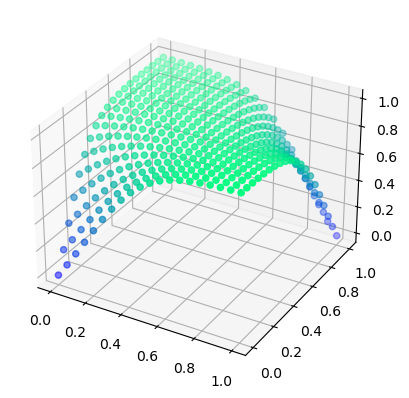

In [19]:
# decision boundary plot
points = []
for x in np.linspace(0, 1, 20):
    for y in np.linspace(0, 1, 20):
        z = predict(network, [[x], [y]])
        points.append([x, y, z[0,0]])

points = np.array(points)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=points[:, 2], cmap="winter")
plt.show()